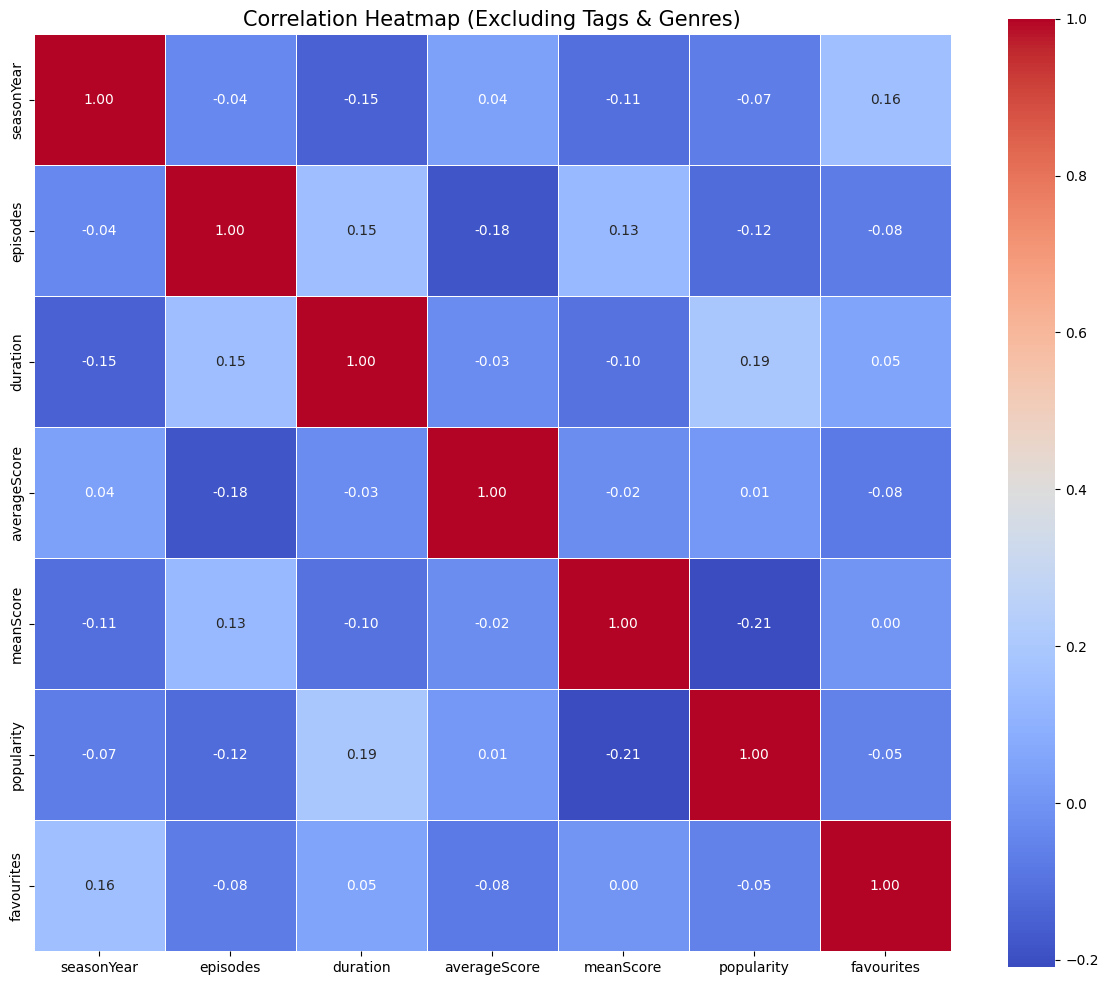

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 로드 (예시: data.csv 파일이 있다고 가정)
df = pd.read_csv('anilist_top10000_eda.csv')

# (테스트를 위한 가상 데이터 프레임 생성 - 실제 사용 시에는 위 read_csv를 사용하세요)
columns_str = "id,format,status,season,seasonYear,episodes,duration,averageScore,meanScore,popularity,favourites,genres,title_romaji,title_english,title_native,tag_list,studios_list,genre_Action,genre_Adventure,genre_Comedy,genre_Drama,genre_Ecchi,genre_Fantasy,genre_Horror,genre_Mahou Shoujo,genre_Mecha,genre_Music,genre_Mystery,genre_Psychological,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Thriller,tag_Achronological Order,tag_Acting,tag_Adoption,tag_Advertisement,tag_Afterlife"
all_columns = columns_str.split(',')

# 더미 데이터 생성 (수치형 컬럼만 랜덤 값 할당)
data = {col: np.random.rand(100) if col in ['seasonYear', 'episodes', 'duration', 'averageScore', 'meanScore', 'popularity', 'favourites'] else ['text']*100 for col in all_columns}
df = pd.DataFrame(data)

# 2. 'tag' 또는 'genre'가 포함된 컬럼 제외 필터링
# 컬럼 이름이 'tag'나 'genre'로 시작하지 않는 것만 선택
filtered_cols = [col for col in df.columns if not (col.startswith('tag') or col.startswith('genre'))]

# 3. 수치형 데이터만 선택 (상관계수는 수치형 데이터 간에만 계산 가능)
# id, title 등 텍스트/식별자 컬럼이 포함되어 있다면 numeric_only=True로 자동 제외하거나 직접 선택해야 합니다.
# 여기서는 명시적으로 수치형 데이터만 선택합니다.
numeric_df = df[filtered_cols].select_dtypes(include=[np.number])

# 불필요한 ID 컬럼 등이 있다면 추가로 제거 (예: 'id'가 수치형으로 인식될 경우 제외)
if 'id' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['id'])

# 4. 상관계수 계산
corr_matrix = numeric_df.corr()

# 5. 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, 
            annot=True,      # 셀 안에 상관계수 값 표시
            fmt='.2f',       # 소수점 2자리까지 표시
            cmap='coolwarm', # 색상 테마 (차가운 색~따뜻한 색)
            linewidths=0.5,  # 셀 간 간격
            square=True)     # 셀을 정사각형으로 출력

plt.title('Correlation Heatmap (Excluding Tags & Genres)', fontsize=15)
plt.tight_layout()
plt.show()


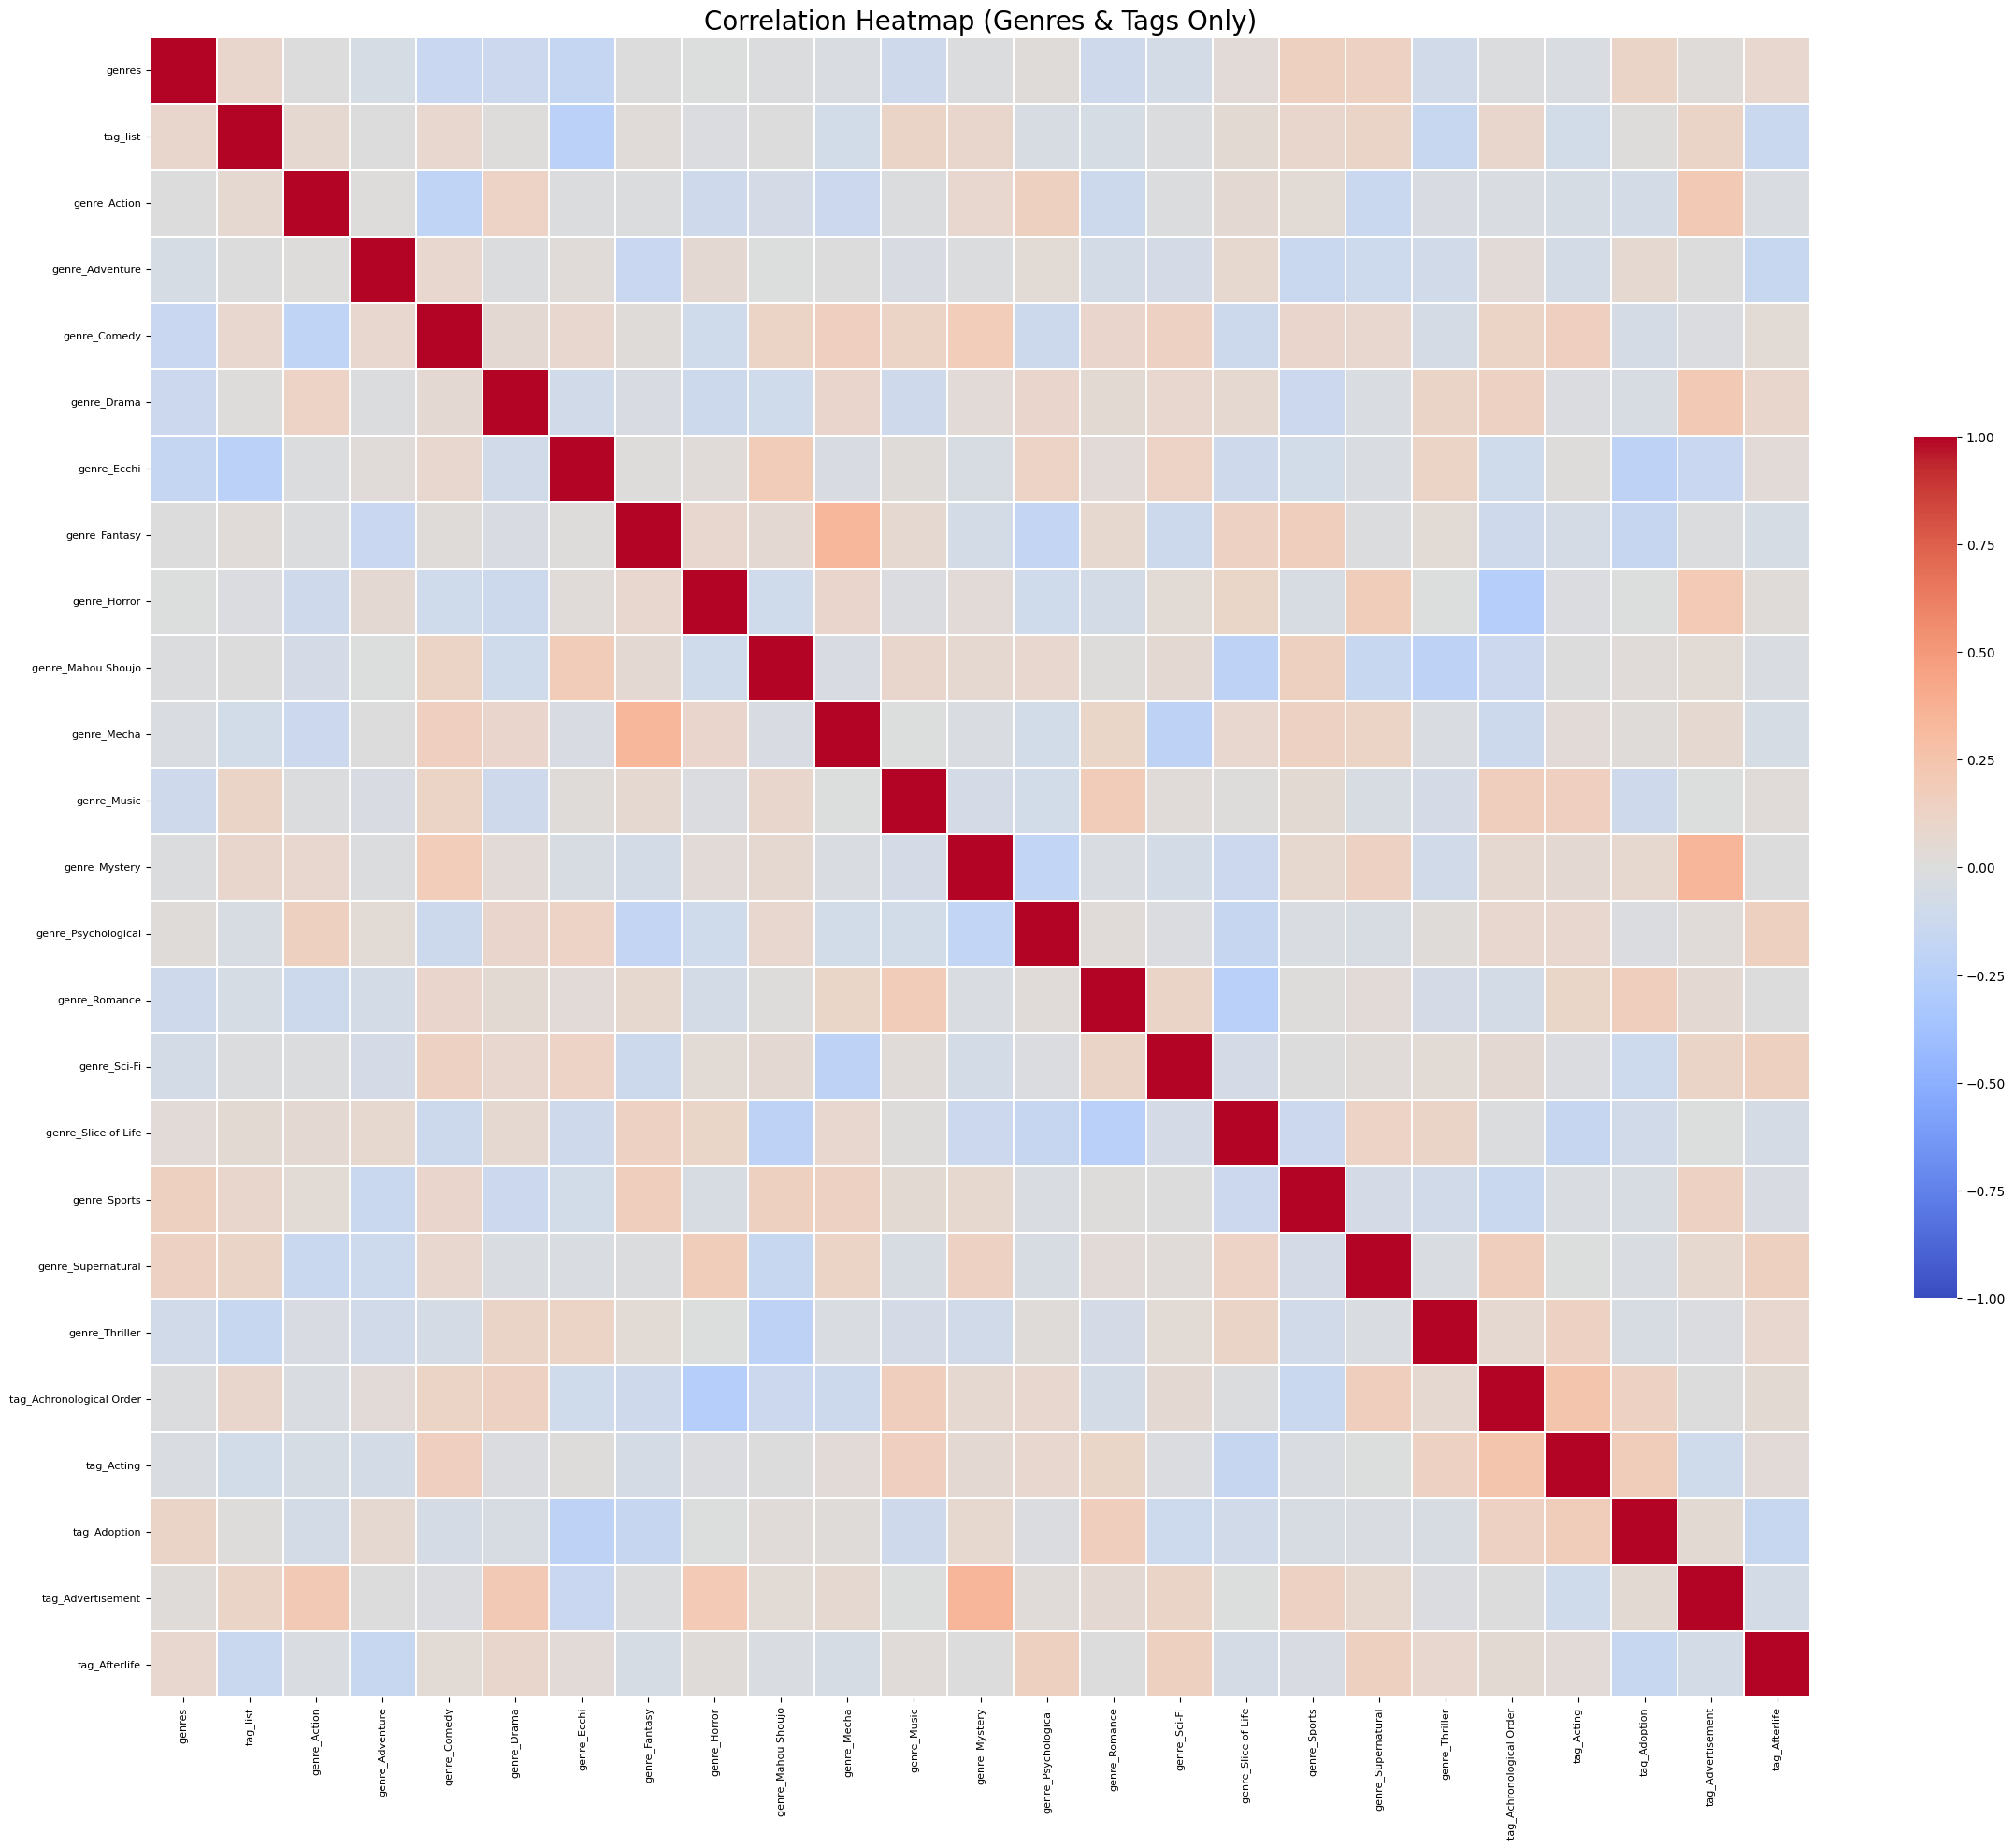

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 로드 (예시)
df = pd.read_csv('anilist_top10000_eda.csv')

# (테스트를 위한 가상 데이터 프레임 생성 코드)
columns_str = "id,format,status,season,seasonYear,episodes,duration,averageScore,meanScore,popularity,favourites,genres,title_romaji,title_english,title_native,tag_list,studios_list,genre_Action,genre_Adventure,genre_Comedy,genre_Drama,genre_Ecchi,genre_Fantasy,genre_Horror,genre_Mahou Shoujo,genre_Mecha,genre_Music,genre_Mystery,genre_Psychological,genre_Romance,genre_Sci-Fi,genre_Slice of Life,genre_Sports,genre_Supernatural,genre_Thriller,tag_Achronological Order,tag_Acting,tag_Adoption,tag_Advertisement,tag_Afterlife" # (일부만 예시로 사용)
all_columns = columns_str.split(',')
data = {col: np.random.randint(0, 2, 100) if (col.startswith('tag') or col.startswith('genre')) else np.random.rand(100) for col in all_columns}
df = pd.DataFrame(data)

# 2. 'tag' 또는 'genre'가 포함된 컬럼만 선택 (필터링)
# startswith를 사용하여 해당 접두사가 있는 컬럼만 가져옵니다.
target_cols = [col for col in df.columns if col.startswith('tag') or col.startswith('genre')]
subset_df = df[target_cols]

# 3. 수치형 데이터만 확실히 선택 및 전처리
# tag_list나 genres 같은 문자열 요약 컬럼이 포함되어 있다면 제외해야 합니다.
numeric_subset_df = subset_df.select_dtypes(include=[np.number])

# 4. 상관계수 계산
corr_matrix = numeric_subset_df.corr()

# 5. 히트맵 시각화
# 컬럼이 많으므로 figsize를 매우 크게 잡아야 합니다.
plt.figure(figsize=(24, 20)) 

sns.heatmap(corr_matrix, 
            annot=False,     # 컬럼이 너무 많으면 수치를 끄는 것이 더 깔끔할 수 있습니다 (필요하면 True)
            cmap='coolwarm', 
            vmin=-1, vmax=1, # 상관계수는 -1 ~ 1 사이
            linewidths=0.1,  # 구분선 얇게
            square=True,
            cbar_kws={"shrink": 0.5}) # 컬러바 크기 조절

plt.title('Correlation Heatmap (Genres & Tags Only)', fontsize=20)
plt.xticks(rotation=90, fontsize=8) # X축 라벨 회전 및 폰트 축소
plt.yticks(fontsize=8)              # Y축 라벨 폰트 축소
plt.tight_layout()
plt.show()


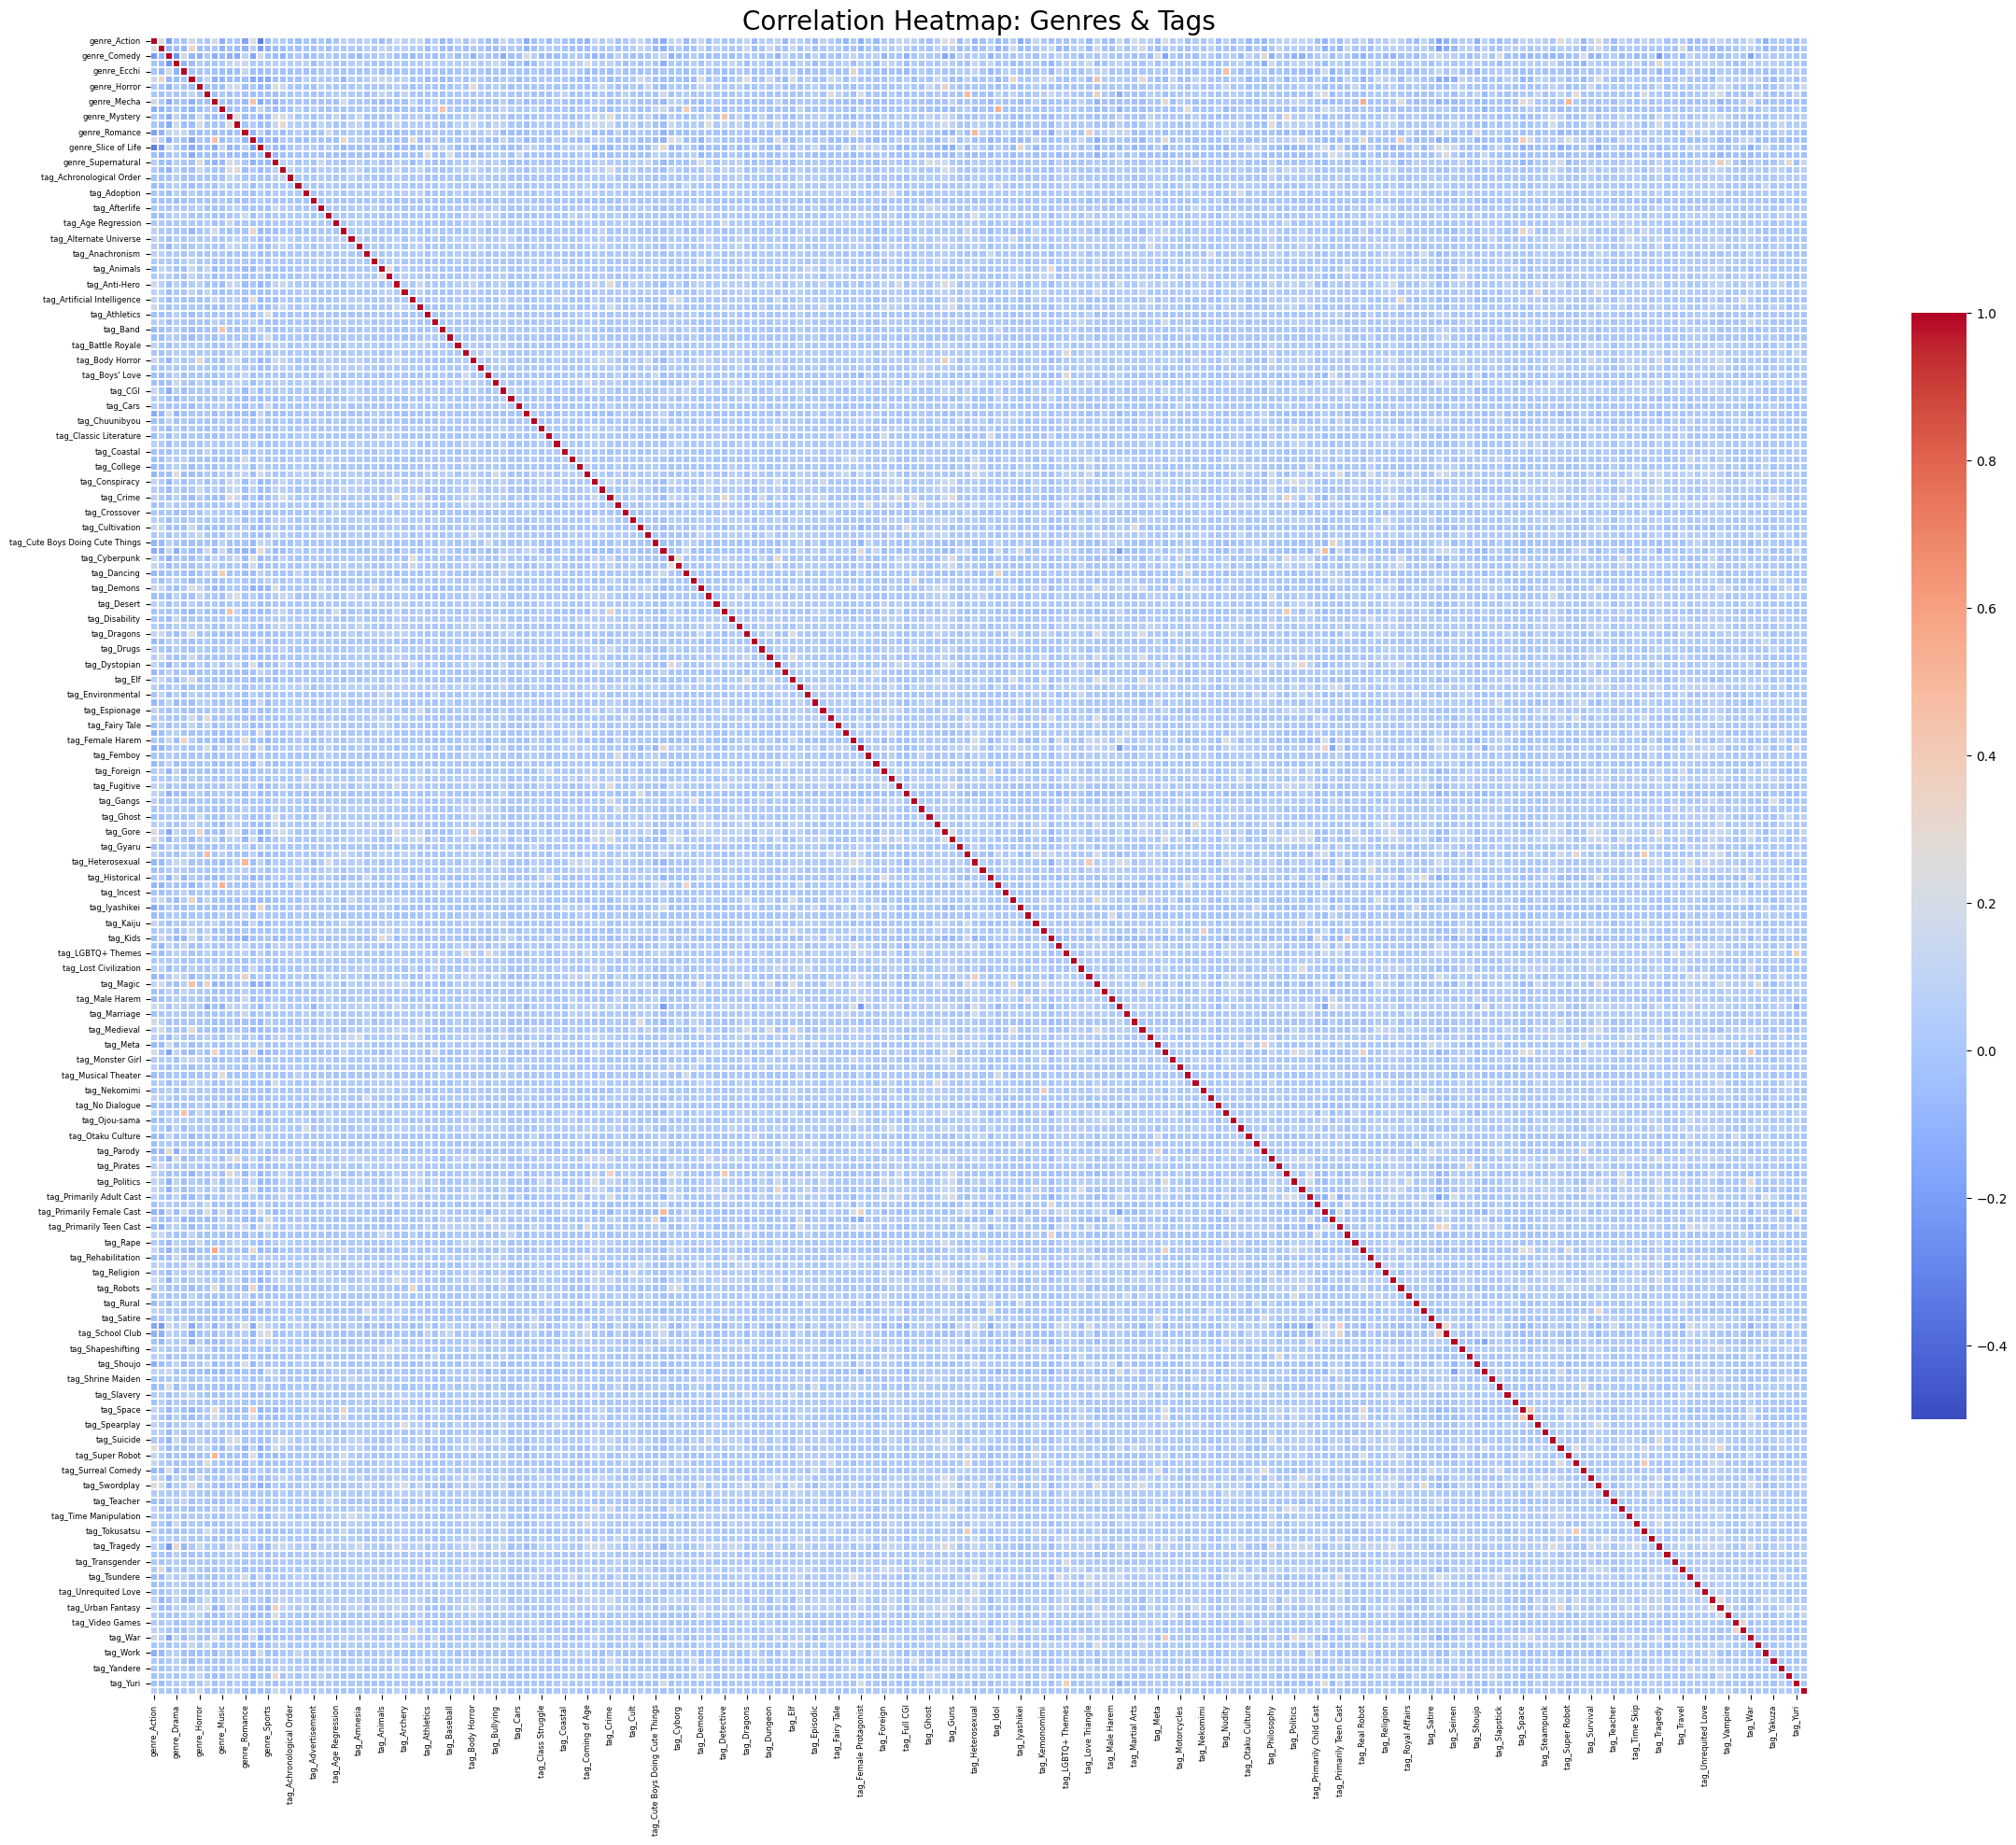

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 로드
file_path = 'anilist_top10000_eda.csv'
df = pd.read_csv(file_path)

# 2. 분석 대상 컬럼 필터링
# 'genre_' 또는 'tag_'로 시작하는 컬럼을 선택하되, 
# 원본 리스트 컬럼인 'tag_list' 등은 제외합니다.
target_cols = [col for col in df.columns 
               if (col.startswith('genre_') or col.startswith('tag_')) 
               and col not in ['tag_list', 'studios_list']] # 리스트 형태 컬럼 제외

subset_df = df[target_cols]

# 3. 상관계수 계산
# 이미 0과 1로 되어 있으므로 바로 corr()을 호출하면 됩니다.
corr_matrix = subset_df.corr()

# 4. 히트맵 시각화
# 태그와 장르가 합쳐서 100개가 넘을 수 있으므로 캔버스 크기를 매우 크게 잡습니다.
plt.figure(figsize=(24, 24))

sns.heatmap(corr_matrix, 
            annot=False,       # 칸이 너무 많으므로 숫자는 표시하지 않음 (전체 패턴 확인용)
            cmap='coolwarm',   # 양의 상관관계(빨강), 음의 상관관계(파랑)
            vmin=-0.5, vmax=1, # 상관계수 범위를 조정하여 강한 관계만 부각 (취향에 따라 조절 가능)
            linewidths=0.01,   # 구분선 아주 얇게
            square=True,       # 정사각형 모양 유지
            cbar_kws={"shrink": 0.5}) # 컬러바 크기 축소

plt.title('Correlation Heatmap: Genres & Tags', fontsize=20)

# X축, Y축 라벨 폰트 크기 조절 (너무 작으면 안 보이므로 적절히 타협)
plt.xticks(rotation=90, fontsize=6) 
plt.yticks(fontsize=6)

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px

# 1. 데이터 로드
file_path = 'anilist_top10000_eda.csv'
df = pd.read_csv(file_path)

# 2. 분석 대상 컬럼 선택 (genre_ 및 tag_ 만)
target_cols = [col for col in df.columns 
               if (col.startswith('genre_') or col.startswith('tag_')) 
               and col not in ['tag_list', 'studios_list']]
subset_df = df[target_cols]

# 3. 전체 상관계수 계산
corr_matrix = subset_df.corr()

# -------------------------------------------------------
# [핵심 로직] 0.3 이상인 관계가 하나라도 있는 컬럼만 남기기
# -------------------------------------------------------

# (1) 대각선(자기 자신과의 관계, 항상 1.0)은 필터링 기준에서 제외하기 위해 0으로 변경
#     (복사본을 만들어 처리하여 원본 corr_matrix는 유지)
temp_corr = corr_matrix.copy()
np.fill_diagonal(temp_corr.values, 0)

# (2) 각 컬럼별로 "다른 컬럼과의 최대 상관계수"가 0.3 이상인지 확인
#     (절대값을 사용하지 않으면 양의 상관관계만 봅니다. 여기서는 0.3 이상인 '양의 관계'만 봅니다)
threshold = 0.3
relevant_cols = temp_corr.columns[(temp_corr >= threshold).any()]

# (3) 필터링된 컬럼들로만 다시 상관행렬 구성
filtered_corr_matrix = corr_matrix.loc[relevant_cols, relevant_cols]

print(f"전체 {len(corr_matrix)}개 컬럼 중, 0.3 이상의 관계가 있는 {len(filtered_corr_matrix)}개 컬럼만 남았습니다.")

# 4. Plotly로 인터랙티브 히트맵 그리기
if len(filtered_corr_matrix) > 0:
    fig = px.imshow(
        filtered_corr_matrix,
        labels=dict(x="Tag/Genre 1", y="Tag/Genre 2", color="Correlation"),
        x=filtered_corr_matrix.columns,
        y=filtered_corr_matrix.columns,
        color_continuous_scale='RdBu_r', # 빨강~파랑
        zmin=-1, 
        zmax=1,
        title=f"Filtered Correlation Heatmap (Corr >= {threshold})"
    )

    fig.update_layout(
        width=900,  
        height=900, # 컬럼이 줄어들었으므로 크기를 조금 조정해도 됩니다
        autosize=False
    )

    fig.show()
else:
    print("조건(0.3 이상)을 만족하는 상관관계가 하나도 없습니다.")


전체 218개 컬럼 중, 0.3 이상의 관계가 있는 63개 컬럼만 남았습니다.


In [4]:
import pandas as pd
import plotly.express as px

# 1. 데이터 로드
file_path = 'anilist_top10000_eda.csv'
df = pd.read_csv(file_path)

# 2. 컬럼 분리 (장르 vs 태그)
# genre_로 시작하는 컬럼 리스트
genre_cols = [col for col in df.columns if col.startswith('genre_')]
# tag_로 시작하는 컬럼 리스트 (리스트 컬럼 제외)
tag_cols = [col for col in df.columns if col.startswith('tag_') and 'list' not in col]

# 3. 교차 상관계수 계산
# 전체 상관계수 행렬을 구한 뒤, [행:장르, 열:태그] 부분만 잘라냅니다 (Slicing)
full_corr = df[genre_cols + tag_cols].corr()
cross_corr = full_corr.loc[genre_cols, tag_cols]

# 4. 시각화를 위한 라벨 깔끔하게 정리 (선택사항)
# 'genre_Action' -> 'Action', 'tag_Zombie' -> 'Zombie'로 이름 변경
cross_corr.index = [name.replace('genre_', '') for name in cross_corr.index]
cross_corr.columns = [name.replace('tag_', '') for name in cross_corr.columns]

# 5. (옵션) 너무 관계가 없는 태그 제거하기
# 어떤 장르와도 0.2 이상의 관계가 없는 '무의미한 태그'는 컬럼에서 제외하여 차트를 깔끔하게 만듭니다.
threshold = 0.2
relevant_tags = cross_corr.columns[(cross_corr.abs() >= threshold).any()]
filtered_cross_corr = cross_corr[relevant_tags]

print(f"전체 태그 중 장르와 {threshold} 이상의 관계가 있는 {len(filtered_cross_corr.columns)}개 태그만 표시합니다.")

# 6. Plotly로 인터랙티브 히트맵 그리기
fig = px.imshow(
    filtered_cross_corr,
    labels=dict(x="Tags (Detail Elements)", y="Genres (Broad Categories)", color="Correlation"),
    x=filtered_cross_corr.columns,
    y=filtered_cross_corr.index,
    color_continuous_scale='RdBu_r', # 빨강~파랑
    zmin=-0.8, # 장르-태그 관계는 1.0까지 잘 안 가므로 범위를 살짝 좁혀 색상 대비를 높임
    zmax=0.8,
    aspect="auto", # 직사각형 비율 자동 조정
    title="Correlation Heatmap: Genres vs Tags"
)

fig.update_layout(
    width=1200,    # 가로로 긴 형태
    height=600,    # 세로는 장르 개수만큼만 필요하므로 적당히
    xaxis={'tickangle': -45} # 태그 이름이 기니까 45도 회전
)

fig.show()


전체 태그 중 장르와 0.2 이상의 관계가 있는 61개 태그만 표시합니다.
